In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
import tensorflow as tf
import keras
from keras import backend as k
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tqdm import tqdm
from keras.preprocessing.sequence import pad_sequences
from keras.models import model_from_json
import nltk
stop_words=set(stopwords.words('english'))

In [2]:
file_en=open(r"C:\Users\Hard Parikh\Desktop\fr-en (2)\europarl-v7.fr-en.en",mode='rt',encoding='utf-8')
file_fr=open(r"C:\Users\Hard Parikh\Desktop\fr-en (2)\europarl-v7.fr-en.fr",mode='rt',encoding='utf-8')

In [3]:
text_en=file_en.read().split('\n')
text_fr=file_fr.read().split('\n')

In [6]:
def text_cleaner(sentence):
    cleaner=re.sub('"','',re.sub(r'\([^)]*\)', '',BeautifulSoup(sentence.lower(),"lxml").text))
    tokens=' '.join([word for word in nltk.word_tokenize(cleaner) if word not in string.punctuation])
    tokens=tokens.split()
#     for i in range(len(tokens)):
#         if(tokens[i] in contraction_mapping):
#             tokens[i]=contraction_mapping[tokens[i]]
#     cleaner=' '.join(tokens)
    cleaner=re.sub("[^a-zA-Z]", " ",re.sub(r"'s\b","",cleaner))
#     tokens=[word for word in cleaner.split() if word not in stop_words]
    long_words=[]
    for i in range(len(tokens)):
        if(len(tokens[i])>=1):
            long_words.append(tokens[i])
    cleaner=(" ".join(long_words)).strip()
    return cleaner

In [17]:
text_len=[]
for i in tqdm(range(len(text_en))):
    text_len.append((len(nltk.word_tokenize(text_en[i]))))


100%|██████████| 2007724/2007724 [04:44<00:00, 7058.48it/s]

In [57]:
median=int(np.median(text_len)/2)
valid_en=[]
valid_fr=[]
for i in tqdm(range(len((text_len)))):
    if(text_len[i]>=5 and text_len[i]<=median):
        valid_en.append(text_en[i])
        valid_fr.append(text_fr[i])



  0%|          | 0/2007724 [00:00<?, ?it/s]

 15%|█▍        | 292576/2007724 [00:00<00:00, 2701801.17it/s]

 28%|██▊       | 560403/2007724 [00:00<00:00, 2694150.60it/s]

 42%|████▏     | 843101/2007724 [00:00<00:00, 2726457.64it/s]

 56%|█████▌    | 1126138/2007724 [00:00<00:00, 2749963.43it/s]

 72%|███████▏  | 1438664/2007724 [00:00<00:00, 2790854.71it/s]

 85%|████████▌ | 1712305/2007724 [00:00<00:00, 2765906.04it/s]

100%|█████████▉| 2001371/2007724 [00:00<00:00, 2801795.10it/s]

100%|██████████| 2007724/2007724 [00:00<00:00, 2775770.48it/s]

In [58]:
len(valid_en)

283220

In [59]:
valid_fr[12]

'Nous ne savons pas ce qui se passe.'

In [60]:
cleaned_english=[]
cleaned_french=[]
for i in tqdm(range(len(valid_en))):
    cleaned_english.append(text_cleaner(valid_en[i]))
for i in tqdm(range(len(valid_fr))):
    cleaned_french.append(text_cleaner(valid_fr[i]))



  0%|          | 0/283220 [00:00<?, ?it/s]

  0%|          | 269/283220 [00:00<01:46, 2656.19it/s]

  0%|          | 590/283220 [00:00<01:40, 2800.07it/s]

  0%|          | 912/283220 [00:00<01:36, 2913.85it/s]

  0%|          | 1241/283220 [00:00<01:33, 3014.80it/s]

  1%|          | 1575/283220 [00:00<01:30, 3101.48it/s]

  1%|          | 1934/283220 [00:00<01:29, 3155.98it/s]

  1%|          | 2264/283220 [00:00<01:28, 3188.66it/s]

  1%|          | 2599/283220 [00:00<01:26, 3231.72it/s]

  1%|          | 2953/283220 [00:00<01:26, 3241.35it/s]

  1%|          | 3268/283220 [00:01<01:27, 3189.76it/s]

  1%|▏         | 3600/283220 [00:01<01:27, 3202.70it/s]

  1%|▏         | 3930/283220 [00:01<01:26, 3224.06it/s]

  2%|▏         | 4266/283220 [00:01<01:26, 3223.16it/s]

  2%|▏         | 4606/283220 [00:01<01:25, 3266.11it/s]

  2%|▏         | 4946/283220 [00:01<01:24, 3297.43it/s]

  2%|▏         | 5302/283220 [00:01<01:24, 3294.20it/s]

  2%|▏         | 5631/283220 [00:01<01:24, 32

In [61]:
en_sentences=[]
fr_sentences=[]
for i in range(len(cleaned_english)):
    if(cleaned_english[i]!=''):
        en_sentences.append(cleaned_english[i])
        fr_sentences.append(cleaned_french[i])

In [63]:
cleaned_english=en_sentences
cleaned_french=fr_sentences
for i in range(len(cleaned_french)):
    cleaned_french[i]='sostok '+cleaned_french[i]+' eostok'

In [179]:
cleaned_english=cleaned_english[:1000]
cleaned_french=cleaned_french[:1000]

In [180]:
english_tokenizer=Tokenizer()
english_tokenizer.fit_on_texts(cleaned_english)
eng_sequences=english_tokenizer.texts_to_sequences(cleaned_english)
eng_len=[]
for i in tqdm(eng_sequences):
    eng_len.append(len(i))
max_seq_len_eng=max(eng_len)
padded_english=np.array(pad_sequences(eng_sequences,maxlen=max_seq_len_eng,padding='post'))

french_tokenizer=Tokenizer()
french_tokenizer.fit_on_texts(cleaned_french)
fr_sequences=french_tokenizer.texts_to_sequences(cleaned_french)
fr_len=[]
for i in tqdm(fr_sequences):
    fr_len.append(len(i))
max_seq_len_fr=max(fr_len)
padded_french=np.array(pad_sequences(fr_sequences,maxlen=max_seq_len_fr,padding='post'))



  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 317894.80it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 501471.07it/s]

In [181]:
eng_sequences

[[299, 450, 196, 17, 4, 451, 92, 779],
 [125, 43, 22, 8, 53, 5, 141],
 [125, 43, 22, 8, 53, 5, 141],
 [9, 26, 55, 80, 452, 44, 780, 781, 453, 782],
 [30, 20, 25, 783, 9, 109, 34, 49, 784],
 [12, 2, 1, 168, 5, 785, 786],
 [93, 16, 21, 24, 787, 788],
 [93, 15, 1, 789, 14, 39, 790, 300, 62, 454],
 [93, 16, 24, 791, 301, 14, 792],
 [25, 793, 794, 6, 109, 795, 54, 4],
 [36, 197, 15, 142, 1, 94, 21, 2, 143, 796],
 [6, 34, 14, 169, 27, 2, 302],
 [24, 110, 15, 39, 303, 797, 3, 798, 13, 799],
 [6, 58, 304, 455, 59, 198, 800],
 [43],
 [233, 15, 40, 39, 801, 86, 8, 170, 5, 4, 802],
 [30, 20, 25, 803],
 [6, 109, 63, 804, 25, 805, 806, 86, 4, 456],
 [12, 2, 14, 8, 457, 3, 305],
 [30, 20, 41, 66],
 [62, 64, 56, 10, 144],
 [21, 2, 24, 807, 17, 110],
 [7, 199, 14, 200],
 [4, 2, 33, 73, 111],
 [20, 199, 14, 458, 112, 459],
 [4, 306, 3, 112, 3, 11, 8, 808, 234],
 [235, 460, 17, 1, 307, 5, 308, 461],
 [9, 26, 309, 20, 3, 809, 4],
 [9, 462, 310, 22, 145, 311, 45],
 [125, 43, 9, 26, 55, 3, 126, 8, 113, 236

In [182]:
fr_seq_len=[]
for i in range(len(fr_sequences)):
    fr_seq_len.append(len(fr_sequences[i]))
median=22

In [183]:
valid_en_seq=[]
valid_fr_seq=[]
for i in range(len(fr_sequences)):
    if(len(fr_sequences[i])<=median):
        valid_en_seq.append(eng_sequences[i])
        valid_fr_seq.append(fr_sequences[i])
print(len(valid_en_seq))
print(len(valid_fr_seq))

997
997


In [184]:
eng_len=[]
for i in tqdm(valid_en_seq):
    eng_len.append(len(i))
max_seq_len_eng=max(eng_len)



  0%|          | 0/997 [00:00<?, ?it/s]

100%|██████████| 997/997 [00:00<00:00, 500086.23it/s]

In [185]:
fr_len=[]
for i in tqdm(valid_fr_seq):
    fr_len.append(len(i))
max_seq_len_fr=max(fr_len)



  0%|          | 0/997 [00:00<?, ?it/s]

100%|██████████| 997/997 [00:00<00:00, 498893.00it/s]

In [186]:
max_seq_len_eng

12

In [187]:
max_seq_len_fr

21

In [188]:
padded_en=np.array(pad_sequences(valid_en_seq,maxlen=max_seq_len_eng,padding='post'))
padded_fr=np.array(pad_sequences(valid_fr_seq,maxlen=max_seq_len_fr,padding='post'))

In [189]:
padded_en.shape

(997, 12)

In [190]:
padded_fr.shape

(997, 21)

In [191]:
vocab_size_eng=len(english_tokenizer.word_index)+1
vocab_size_fr=len(french_tokenizer.word_index)+1

In [236]:
from keras import backend as K 
from keras.layers import Input,Embedding,LSTM
from Attention.layers.attention import AttentionLayer
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
from Attention.layers.attention import AttentionLayer
K.clear_session()

latent_dim = 100
embedding_dim=100
max_text_len=max_seq_len_eng

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(vocab_size_eng, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(vocab_size_fr, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])
# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(vocab_size_fr, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 12)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 12, 100)      182900      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 12, 100), (N 80400       embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [238]:
x_tr=padded_en
y_tr=padded_fr
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=200,validation_split=.2,batch_size=128,verbose=2)

Train on 797 samples, validate on 200 samples
Epoch 1/200
797/797 - 7s - loss: 1.0727 - acc: 0.7681 - val_loss: 3.3839 - val_acc: 0.6077
Epoch 2/200
797/797 - 4s - loss: 1.0511 - acc: 0.7733 - val_loss: 3.3888 - val_acc: 0.6077
Epoch 3/200
797/797 - 4s - loss: 1.0389 - acc: 0.7774 - val_loss: 3.3924 - val_acc: 0.6085
Epoch 4/200
797/797 - 4s - loss: 1.0311 - acc: 0.7800 - val_loss: 3.3965 - val_acc: 0.6077
Epoch 5/200
797/797 - 4s - loss: 1.0220 - acc: 0.7831 - val_loss: 3.4062 - val_acc: 0.6085
Epoch 6/200
797/797 - 4s - loss: 1.0159 - acc: 0.7836 - val_loss: 3.4084 - val_acc: 0.6085
Epoch 7/200
797/797 - 4s - loss: 1.0047 - acc: 0.7866 - val_loss: 3.4026 - val_acc: 0.6080
Epoch 8/200
797/797 - 4s - loss: 0.9983 - acc: 0.7862 - val_loss: 3.4084 - val_acc: 0.6090
Epoch 9/200
797/797 - 4s - loss: 0.9921 - acc: 0.7891 - val_loss: 3.4162 - val_acc: 0.6080
Epoch 10/200
797/797 - 4s - loss: 0.9852 - acc: 0.7893 - val_loss: 3.4228 - val_acc: 0.6095
Epoch 11/200
797/797 - 4s - loss: 0.9788 - 

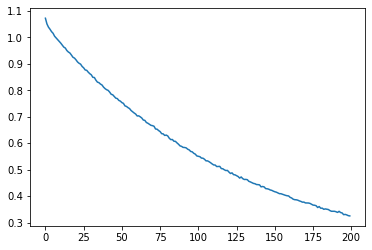

In [239]:
plt.plot(history.history['loss'])
plt.show()

In [208]:
reverse_target_word_index=french_tokenizer.index_word
reverse_source_word_index=english_tokenizer.index_word
target_word_index=french_tokenizer.word_index
reverse_target_word_index[0]='sostok'

In [209]:
encoder=Model(encoder_inputs,[encoder_outputs,state_h,state_c])
decoder_state_h=Input(shape=(latent_dim,))
decoder_state_c=Input(shape=(latent_dim,))
decoder_hidden_state_input=Input(shape=(max_text_len,latent_dim))
dec_emb2=dec_emb_layer(decoder_inputs)
decoder_output2,state_h2,state_c2=decoder_lstm(dec_emb2,initial_state=[decoder_state_h,decoder_state_c])
attn_out_inf,attn_states_inf=attn_layer([decoder_hidden_state_input,decoder_output2])
decoder_inf_concat=Concatenate(axis=-1,name='concat')([decoder_output2,attn_out_inf])
decoder_output2=decoder_dense(decoder_inf_concat)
decoder=Model([decoder_inputs] + [decoder_hidden_state_input,decoder_state_h, decoder_state_c],[decoder_output2] + [state_h2, state_c2])

In [210]:
def decode_sequence(input_seq):
    e_out,e_h,e_c=encoder.predict(input_seq)
    target_seq=np.zeros((1,1))
    target_seq[0,0]=target_word_index['sostok']
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

            # Exit condition: either hit max length or find stop word.
            if (sampled_token == 'eostok' or len(decoded_sentence.split()) >= (max_seq_len_fr-1)):
                stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [211]:
def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [212]:
for i in tqdm(range(len(x_tr[:10]))):
    print("Review:",seq2text(x_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_seq_len_eng)))
    print("\n")



  0%|          | 0/997 [00:00<?, ?it/s]

Review: please rise then for this minute s silence 
Predicted summary:  je vous invite à vous lever pour cette minute de silence sostok sostok sostok sostok sostok sostok sostok sostok sostok






  0%|          | 1/997 [00:01<21:19,  1.28s/it]

Review: madam president on a point of order 
Predicted summary:  madame la présidente c'est une motion de procédure sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: madam president on a point of order 
Predicted summary:  madame la présidente c'est une motion de procédure sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  0%|          | 3/997 [00:01<15:15,  1.09it/s]

Review: i would like your advice about rule 143 concerning inadmissibility 
Predicted summary:  je voudrais vous demander un conseil au sujet de l'article 143 qui concerne l'irrecevabilité sostok sostok sostok sostok sostok sostok


Review: thank you mr segni i shall do so gladly 
Predicted summary:  merci monsieur segni je le ferai bien volontiers sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  1%|          | 5/997 [00:01<11:03,  1.50it/s]

Review: it is the case of alexander nikitin 
Predicted summary:  il s'agit du cas d'alexandre nikitin sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: why are there no fire instructions 
Predicted summary:  comment se fait il qu'il n y ait pas de consignes en cas d'incendie sostok sostok sostok sostok sostok sostok






  1%|          | 7/997 [00:01<08:06,  2.04it/s]

Review: why have the staircases not been improved since my accident 
Predicted summary:  comment se fait il que l'on ne respecte pas les zones non fumeurs sostok sostok sostok sostok sostok sostok sostok


Review: why are no smoking areas not enforced 
Predicted summary:  comment se fait il que l'on ne respecte pas les zones non fumeurs sostok sostok sostok sostok sostok sostok sostok






  1%|          | 9/997 [00:01<06:01,  2.73it/s]

Review: mr berenguer fuster we shall check all this 
Predicted summary:  cher collègue nous allons vérifier tout cela sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: as people have said the situation there is extremely volatile 
Predicted summary:  d'aucuns l'ont dit la situation en indonésie est extrêmement explosive sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  1%|          | 11/997 [00:02<04:32,  3.61it/s]

Review: we do not know what is happening 
Predicted summary:  nous ne voulons pas seulement bâtir une europe de villes sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: no amendments have been proposed relating to monday and tuesday 
Predicted summary:  s agissant de lundi et mardi je n ai pas de modifications sostok sostok sostok sostok sostok sostok sostok sostok






  1%|▏         | 13/997 [00:02<03:31,  4.66it/s]

Review: we therefore respect whatever parliament may decide 
Predicted summary:  nous ne voulons pas seulement bâtir une europe de villes sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: president 
Predicted summary:  monsieur le président je voudrais apporter quelques précisions sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  2%|▏         | 15/997 [00:02<02:50,  5.77it/s]

Review: decisions have also been adopted against a tax of this kind 
Predicted summary:  des décisions existent qui s'opposent à une telle taxe sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: thank you mr poettering 
Predicted summary:  merci monsieur poettering sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  2%|▏         | 17/997 [00:02<02:24,  6.78it/s]

Review: we shall now hear mr wurtz speaking against this request 
Predicted summary:  nous entendons à présent m wurtz qui s exprime contre cette demande sostok sostok sostok sostok sostok sostok sostok sostok


Review: it is not a lot to ask 
Predicted summary:  il est clair que l'objectif est plus ambitieux sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  2%|▏         | 19/997 [00:02<02:04,  7.89it/s]

Review: thank you very much 
Predicted summary:  merci beaucoup sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: my vote was in favour 
Predicted summary:  j'ai voté pour sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  2%|▏         | 21/997 [00:02<01:47,  9.11it/s]

Review: there is no room for amendments 
Predicted summary:  il est encore en outre la question des achats hors taxe sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: that did not happen 
Predicted summary:  ce n est pas toujours le cas sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  2%|▏         | 23/997 [00:02<01:34, 10.31it/s]

Review: this is an important matter 
Predicted summary:  c'est important sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: you did not call me either 
Predicted summary:  moi non plus vous ne m'avez pas donné la parole sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  3%|▎         | 25/997 [00:03<01:26, 11.21it/s]

Review: this seems to me to be a workable solution 
Predicted summary:  il me semble que c'est une bonne formule sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: safety advisers for the transport of dangerous goods 
Predicted summary:  conseillers à la sécurité pour le transport de marchandises dangereuses sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  3%|▎         | 27/997 [00:03<01:20, 12.11it/s]

Review: i would urge you to endorse this 
Predicted summary:  je vous demande votre approbation sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: i congratulate him on his excellent report 
Predicted summary:  je le félicite de son excellent rapport sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  3%|▎         | 29/997 [00:03<01:15, 12.81it/s]

Review: madam president i would like to make a few comments 
Predicted summary:  madame la présidente je voudrais faire quelques remarques sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: this is a pity in a sense 
Predicted summary:  il s'agit d'une perte irréparable sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  3%|▎         | 31/997 [00:03<01:11, 13.45it/s]

Review: in short the issue is an important one 
Predicted summary:  bref le sujet est très important sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: i would like to mention one final point 
Predicted summary:  je me permets de soulever un dernier point sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  3%|▎         | 33/997 [00:03<01:09, 13.79it/s]

Review: this gives them a competitive edge for the interim period 
Predicted summary:  cela leur conférera un avantage concurrentiel temporaire sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: this however does not seem feasible 
Predicted summary:  toutefois cela ne paraît pas réalisable sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  4%|▎         | 35/997 [00:03<01:09, 13.79it/s]

Review: i should like to make just a few comments 
Predicted summary:  je voudrais émettre quelques rares remarques sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: my third point has also been mentioned already 
Predicted summary:  le troisième point a lui aussi été déjà évoqué sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  4%|▎         | 37/997 [00:03<01:10, 13.64it/s]

Review: the debate is closed 
Predicted summary:  le débat est clos sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: the vote will take place tomorrow at 12 p m 
Predicted summary:  le vote aura lieu demain à 12 heures sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  4%|▍         | 39/997 [00:04<01:08, 13.94it/s]

Review: transport of dangerous goods by road 
Predicted summary:  transport de marchandises dangereuses par route sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: i thought that it was quite superb 
Predicted summary:  j'ai trouvé cela tout à fait exceptionnel sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  4%|▍         | 41/997 [00:04<01:06, 14.39it/s]

Review: this directive is a contribution to this 
Predicted summary:  cette directive y contribue sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: what we are doing today is essentially a nuisance 
Predicted summary:  nous ne devons pas faire seulement où en place des contrôles sostok sostok sostok sostok sostok sostok sostok sostok sostok






  4%|▍         | 43/997 [00:04<01:06, 14.35it/s]

Review: most of the proposed amendments are of a purely technical nature 
Predicted summary:  la plupart des propositions d amendement sont de nature purement technique sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: we therefore accept the four amendments which have been proposed 
Predicted summary:  nous acceptons donc les quatre amendements qui nous ont été proposés sostok sostok sostok sostok sostok sostok sostok sostok sostok






  5%|▍         | 45/997 [00:04<01:06, 14.40it/s]

Review: the debate is closed 
Predicted summary:  le débat est clos sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: the vote will take place tomorrow at 12 p m 
Predicted summary:  le vote aura lieu demain à 12 heures sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  5%|▍         | 47/997 [00:04<01:06, 14.32it/s]

Review: structural funds cohesion fund coordination 
Predicted summary:  coordination fonds structurels fonds de cohésion sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: we have seen the gap between rich and poor widen 
Predicted summary:  nous devons leur en donner la possibilité sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  5%|▍         | 49/997 [00:04<01:06, 14.20it/s]

Review: poverty and wealth used to depend more on means of livelihood 
Predicted summary:  autrefois la pauvreté et la richesse étaient plus tributaires des structures de la vie économique sostok sostok sostok sostok sostok


Review: the consequences do not inspire hope 
Predicted summary:  les conséquences ne se font pas attendre sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  5%|▌         | 51/997 [00:04<01:06, 14.26it/s]

Review: agriculture only provides 5 5 of employment in the union 
Predicted summary:  l'agriculture fournit seulement 5 5 de l'emploi de l'union sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: i think that this work has been carried out extremely well 
Predicted summary:  je pense que c'est un très bon travail sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  5%|▌         | 53/997 [00:05<01:06, 14.29it/s]

Review: i suggest mr evans goes back and reads the regulation 
Predicted summary:  je suggère à m evans d'aller relire le règlement sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: we are badly behind now in this matter 
Predicted summary:  nous sommes maintenant très en retard sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  6%|▌         | 55/997 [00:05<01:05, 14.41it/s]

Review: this report is very good and our group supports it 
Predicted summary:  ce rapport est tout à fait bon et notre groupe le soutient sostok sostok sostok sostok sostok sostok sostok sostok


Review: some speakers have already mentioned unemployment and the fall in population 
Predicted summary:  certains collègues ont déjà parlé du chômage et de la diminution de la démographie sostok sostok sostok sostok sostok sostok






  6%|▌         | 57/997 [00:05<01:04, 14.47it/s]

Review: this is what we are today asking the commissioner for 
Predicted summary:  c'est ce que nous demandons aujourd'hui au commissaire sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: this latter point is of particular importance 
Predicted summary:  ce point est d'une extrême importance sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  6%|▌         | 59/997 [00:05<01:04, 14.62it/s]

Review: we do not want to build a europe of cities alone 
Predicted summary:  nous ne voulons pas seulement bâtir une europe de villes sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: this is what persuades us to vote in favour of it 
Predicted summary:  c'est ceci qui nous conduira à le voter sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  6%|▌         | 61/997 [00:05<01:04, 14.62it/s]

Review: i would like to explain our thinking here 
Predicted summary:  je voudrais expliquer notre pensée sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: i urge the house to support these changes 
Predicted summary:  j'invite le parlement à soutenir ces modifications sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  6%|▋         | 63/997 [00:05<01:03, 14.71it/s]

Review: regional disparities are becoming much more marked within the member states 
Predicted summary:  les écarts régionaux se creusent dramatiquement au sein des états membres sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: they are growing but only in terms of gdp 
Predicted summary:  elles croissent mais au niveau du pib sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  7%|▋         | 65/997 [00:05<01:04, 14.40it/s]

Review: this is the purpose of these guidelines 
Predicted summary:  voilà pour l objectif de ces orientations sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: i actually quoted the text itself in quotation marks 
Predicted summary:  c est le texte même que j ai cité entre guillemets sostok sostok sostok sostok sostok sostok sostok sostok sostok






  7%|▋         | 67/997 [00:05<01:03, 14.59it/s]

Review: i find the opposite the case 
Predicted summary:  il s'agit d'eurodac sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: the debate is closed 
Predicted summary:  le débat est clos sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  7%|▋         | 69/997 [00:06<01:02, 14.78it/s]

Review: the vote will take place tomorrow at 12 p m 
Predicted summary:  le vote aura lieu demain à 12 heures sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: social and economic situation and development of the regions of the union 
Predicted summary:  situation développement social et économique des régions de l union sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  7%|▋         | 71/997 [00:06<01:02, 14.74it/s]

Review: the european commission s sixth report presents very valuable conclusions 
Predicted summary:  le sixième rapport de la commission européenne tire des conclusions très précieuses sostok sostok sostok sostok sostok sostok sostok sostok


Review: very rapid growth is continuing in central europe 
Predicted summary:  il faut accélérer les programmes actuels sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  7%|▋         | 73/997 [00:06<01:02, 14.73it/s]

Review: the member states must also bear in mind their responsibility 
Predicted summary:  les états membres ont aussi leur part de responsabilité dans ce domaine et ils ne doivent pas l oublier sostok


Review: for example uncontrolled migration has not been given sufficient consideration 
Predicted summary:  par exemple le flux migratoire incontrôlé n a pas été suffisamment pris en considération sostok sostok sostok sostok sostok sostok






  8%|▊         | 75/997 [00:06<01:03, 14.55it/s]

Review: our group is in favour of adopting this report 
Predicted summary:  notre groupe est favorable à l adoption de ce rapport sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: they are supported by appropriate european union structural fund activities 
Predicted summary:  tout ceci doit être soutenu par des activités appropriées en provenance des fonds structurels de l'union européenne sostok sostok sostok






  8%|▊         | 77/997 [00:06<01:03, 14.53it/s]

Review: the situation varies to an enormous degree throughout the regions 
Predicted summary:  il s'agit de région les situations sont très très différentes sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: surely this must be the ultimate goal 
Predicted summary:  et finalement c'est bien l'objectif recherché sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  8%|▊         | 79/997 [00:06<01:03, 14.45it/s]

Review: what is the result 
Predicted summary:  quelle en est la conséquence sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: we must give them this opportunity 
Predicted summary:  nous devons leur en donner la possibilité sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  8%|▊         | 81/997 [00:06<01:05, 14.01it/s]

Review: what is a fair society 
Predicted summary:  qu'est ce qu'une société équitable sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: in reunion for example the rate is 37 
Predicted summary:  ce taux est de 37 à la réunion par exemple sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  8%|▊         | 83/997 [00:07<01:05, 14.04it/s]

Review: it only remains to put this principle into practice 
Predicted summary:  reste à traduire ce principe en actes sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: i therefore appeal formally to the council and the commission 
Predicted summary:  je lance dès lors un appel solennel au conseil et à la commission sostok sostok sostok sostok sostok sostok sostok






  9%|▊         | 85/997 [00:07<01:03, 14.28it/s]

Review: so much for the quality 
Predicted summary:  voilà pour la qualité sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: i agree with your analysis 
Predicted summary:  je suis d'accord avec votre analyse sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  9%|▊         | 87/997 [00:07<01:03, 14.23it/s]

Review: i should like to mention a few specific points 
Predicted summary:  je voudrais évoquer quelques points spécifiques sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: this is my first point regarding the policy 
Predicted summary:  c'est le premier point politique sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  9%|▉         | 89/997 [00:07<01:03, 14.34it/s]

Review: thank you very much commissioner 
Predicted summary:  merci beaucoup monsieur le commissaire sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: the debate is closed 
Predicted summary:  le débat est clos sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  9%|▉         | 91/997 [00:07<01:02, 14.51it/s]

Review: the vote will take place tomorrow at 12 p m 
Predicted summary:  le vote aura lieu demain à 12 heures sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: adoption of the minutes of the previous sitting 
Predicted summary:  adoption du procès verbal de la séance précédente sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






  9%|▉         | 93/997 [00:07<01:02, 14.54it/s]

Review: the minutes of yesterday s sitting have been distributed 
Predicted summary:  le procès verbal de la séance d'hier a été distribué sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: are there any comments 
Predicted summary:  il convient de lui redonner confiance en la politique de l ue sostok sostok sostok sostok sostok sostok sostok sostok






 10%|▉         | 95/997 [00:07<01:02, 14.44it/s]

Review: i refer to item 11 on the order of business 
Predicted summary:  je veux parler du point 11 de l'ordre des travaux sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: that is something for which i have a deep appreciation 
Predicted summary:  j'apprécie fortement cette attitude sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






 10%|▉         | 97/997 [00:08<01:01, 14.72it/s]

Review: it should not be dramatised into something more than that 
Predicted summary:  il est essentiel que les réformes ne se limitent pas à la commission sostok sostok sostok sostok sostok sostok sostok


Review: thank you very much mr cox 
Predicted summary:  merci beaucoup madame fraga sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






 10%|▉         | 99/997 [00:08<01:00, 14.74it/s]

Review: i understand what you are saying 
Predicted summary:  je vois ce que vous voulez dire sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: we have taken note of this 
Predicted summary:  nous avons des papiers de la commission qui parlent d'engagements fermes sostok sostok sostok sostok sostok sostok sostok sostok sostok






 10%|█         | 101/997 [00:08<01:00, 14.71it/s]

Review: it therefore needs to be withdrawn from today 's agenda 
Predicted summary:  il y a lieu de les mettre en uvre dans les plus brefs délais sostok sostok sostok sostok sostok sostok


Review: mr wynn that makes sense 
Predicted summary:  c'est logique m wynn sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






 10%|█         | 103/997 [00:08<00:59, 14.91it/s]

Review: the report is hereby withdrawn from the agenda 
Predicted summary:  le rapport est donc retiré de l'ordre du jour sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: mrs ahern we have taken note of this 
Predicted summary:  madame ahern nous en avons pris note sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






 11%|█         | 105/997 [00:08<01:00, 14.74it/s]

Review: we will also pass this on to our services however 
Predicted summary:  néanmoins nous en ferons également part à nos services sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: thank you very much 
Predicted summary:  merci beaucoup sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






 11%|█         | 107/997 [00:08<01:00, 14.73it/s]

Review: reform of european competition policy 
Predicted summary:  il y a une manière très simple de régler ces affaires sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: the next item is the joint debate on the following reports 
Predicted summary:  l'ordre du jour appelle en discussion commune les rapports suivants sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






 11%|█         | 109/997 [00:08<01:00, 14.63it/s]

Review: it should continue along this path 
Predicted summary:  elle devrait poursuivre dans cette voie sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: competition is an instrument and does not always produce ideal solutions 
Predicted summary:  il est clair que la manière dont la commission administre les affaires n'est pas particulièrement bonne sostok sostok sostok sostok






 11%|█         | 111/997 [00:09<01:02, 14.29it/s]

Review: seven amendments have been retabled for this plenary sitting 
Predicted summary:  sept amendements sont redéposés pour cette séance plénière sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: the ecsc treaty is due to expire shortly 
Predicted summary:  le traité ceca expirera très prochainement sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






 11%|█▏        | 113/997 [00:09<01:01, 14.28it/s]

Review: no one wants an unimpeded subsidy competition in europe 
Predicted summary:  personne ne veut que l'europe soit le théâtre d'une course effrénée aux subventions sostok sostok sostok sostok sostok sostok sostok


Review: subsidies distort allocations both within and between countries 
Predicted summary:  les subventions faussent l effet escompté de nos efforts financiers tant au sein qu'entre les pays sostok sostok sostok sostok






 12%|█▏        | 115/997 [00:09<01:01, 14.30it/s]

Review: public monopolies must be replaced by competitive structures 
Predicted summary:  les monopoles publics doivent être remplacés par des structures compétitives sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: effective competition pushes prices down and raises standards of living 
Predicted summary:  il convient également de garantir l'excellence et la transparence sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






 12%|█▏        | 117/997 [00:09<01:01, 14.22it/s]

Review: in fact competition policy and consumer policy belong together 
Predicted summary:  ce sont les procédures t il convient de les concrétiser sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: the internal market is the basis for our work 
Predicted summary:  le marché intérieur est la base de notre travail sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






 12%|█▏        | 119/997 [00:09<01:03, 13.88it/s]

Review: the law must be correctly applied in matters of competition 
Predicted summary:  l adaptation du droit aux questions de concurrence doit être satisfaisante sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: we have a quite exciting debate in front of us 
Predicted summary:  nous devons faire quelque chose pour remédier à cette situation sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






 12%|█▏        | 121/997 [00:09<01:01, 14.23it/s]

Review: all this is to the good of the consumer 
Predicted summary:  tout cela au bénéfice du consommateur sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: the second point relates to the retrodisplacement of law enforcement 
Predicted summary:  le second point concerne la syrie sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






 12%|█▏        | 123/997 [00:09<01:00, 14.42it/s]

Review: this own initiative must not be destroyed by european intervention 
Predicted summary:  cette initiative ne peut être détruite au niveau européen sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: thank you very much mr radwan 
Predicted summary:  je vous remercie cher collègue sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






 13%|█▎        | 125/997 [00:09<01:01, 14.27it/s]

Review: the market favours the short term and immediate profits 
Predicted summary:  le marché privilégie le court terme et les gains immédiats sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: in order to function the market needs rules 
Predicted summary:  le marché pour fonctionner a besoin de règles sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






 13%|█▎        | 127/997 [00:10<01:00, 14.49it/s]

Review: it would be a serious mistake to eliminate all public aid 
Predicted summary:  écarter toute aide publique serait une grave erreur sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: we socialists reject the liberals naïve optimism on this point 
Predicted summary:  nous socialistes nous refusons cet angélisme libéral sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






 13%|█▎        | 129/997 [00:10<00:59, 14.62it/s]

Review: we want a true culture of competition in europe 
Predicted summary:  nous voulons une vraie culture de la concurrence en europe sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: how do we ensure that unlawful state aid is paid back 
Predicted summary:  comment pouvons­nous avoir la garantie que cette aide d'état illégale sera remboursée sostok sostok sostok sostok sostok sostok sostok sostok






 13%|█▎        | 131/997 [00:10<00:59, 14.65it/s]

Review: should we not be discussing this issue 
Predicted summary:  il est là des incidents et des leçons sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok


Review: when will we debate that 
Predicted summary:  le évolution nous occupera t elle jamais sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok






 13%|█▎        | 133/997 [00:10<00:59, 14.62it/s]

Review: secondly i understand the worry of industry regarding legal certainty 


KeyboardInterrupt: 

In [213]:
decode_sequence(x_tr[15].reshape(1,max_seq_len_eng))

" des décisions existent qui s'opposent à une telle taxe sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok"

In [216]:
x_tr[0].shape

(12,)

In [232]:
test_text='i would urge you to endorse this '
test_text_padded=pad_sequences(english_tokenizer.texts_to_sequences([test_text]),maxlen=max_seq_len_eng,padding='post')[0].reshape(1,max_seq_len_eng)

In [233]:
decode_sequence(test_text_padded)

' je vous demande votre approbation sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok'